In [116]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 24 14:28:26 2018

@author: daniyalusmani
"""
from io import BytesIO
import base64
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
import datetime;
import pickle;
import seaborn as sns; sns.set()
import json

In [ ]:
#df = pd.read_csv('/activity/Uusimaa_activity_data_hourly_20_min_break_MTC_20180109.txt')
df1 = pd.read_csv('activity/Uusimaa_activity_data_hourly_20_min_break_MTC_201801.txt')
df2 = pd.read_csv('activity/Uusimaa_activity_data_hourly_20_min_break_MTC_201802.txt')
df3 = pd.read_csv('activity/Uusimaa_activity_data_hourly_20_min_break_MTC_201803.txt')
df4 = pd.read_csv('activity/Uusimaa_activity_data_hourly_20_min_break_MTC_201804.txt')
df5 = pd.read_csv('activity/Uusimaa_activity_data_hourly_20_min_break_MTC_201805.txt')
df6 = pd.read_csv('activity/Uusimaa_activity_data_hourly_20_min_break_MTC_201806.txt')
frames = [ df1, df2, df3, df4, df5, df6]
df = pd.concat(frames)
df.head()

In [ ]:
# print('number of dominant zones in sample', len(df.dominant_zone.unique()))
def getPrediction(zoneNum = 10):

    prediction = df[df['dominant_zone']== zoneNum]
    
    prediction["Datetime"] = pd.to_datetime(prediction["time"],format='%d.%m.%Y %H.%M.%S')
    
    prediction['hour'] = prediction.Datetime.dt.hour
    
    # Calculate average hourly fraction
    hourly_frac = prediction.groupby(['hour']).mean()/np.sum(prediction.groupby(['hour']).mean())
    hourly_frac.drop(['dominant_zone'], axis = 1, inplace = True)
    hourly_frac.columns = ['fraction']
    
    # convert to time series from dataframe
    prediction.index = prediction.Datetime
    prediction.drop(['dominant_zone','hour','Datetime'], axis = 1, inplace = True)
    
    daily_train = prediction.resample('H').sum()
    
    daily_train['ds'] = daily_train.index
    daily_train['y'] = daily_train["count"]
    daily_train.drop(['count'],axis = 1, inplace = True)
    
    m = Prophet(daily_seasonality=True, seasonality_prior_scale=0.1)
    m.fit(daily_train)
    future = m.make_future_dataframe(periods=24, freq='H')
    forecast = m.predict(future)
    forecast.daily = forecast.daily.clip(0)
    forecast.weekly = forecast.weekly.clip(0)
    forecast.yhat = forecast.yhat.clip(0)
    #fig1 = m.plot(forecast)
    
    # components of forecast, yearly, weekly
    # m.plot_components(forecast)
    return forecast, m
# ret = load_obj('forecast-1000')

In [73]:
forc, m = getPrediction(zoneNum=212)

In [ ]:
#m = Prophet(daily_seasonality=True, seasonality_prior_scale=0.1)

Text(32.25, 0.5, 'crowd_count')

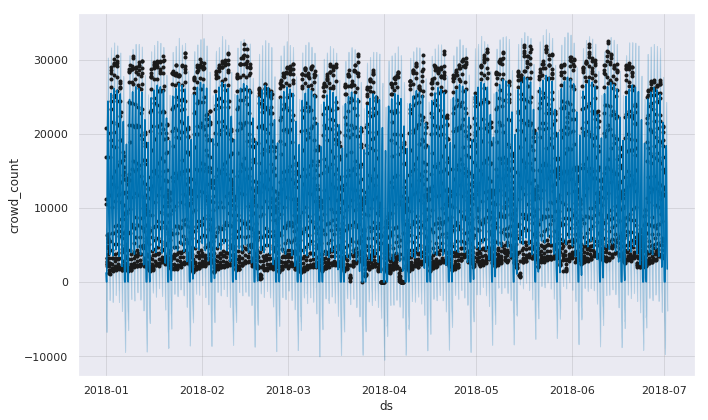

In [74]:
#plt.figure(figsize=(12,10))
m.plot(forc)
plt.ylabel("crowd_count")

Text(0.5, 1.0, 'weekly trend')

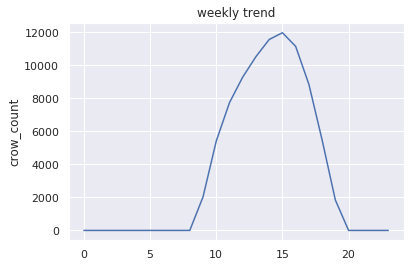

In [93]:
#figs_c = m.plot_components(forc.daily)
plt.plot(forc.daily[0:24])
#plt.barh(forc.daily, width=10)
#plt.xticks(["a", "b", "c"])
plt.ylabel("crow_count")
plt.title("weekly trend")

<BarContainer object of 23 artists>

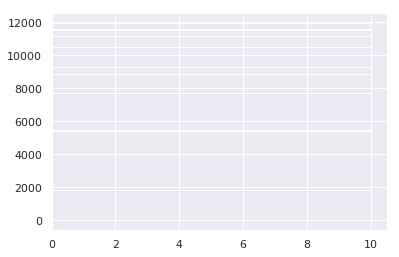

In [80]:
plt.barh(forc.daily[1:24], width=10)

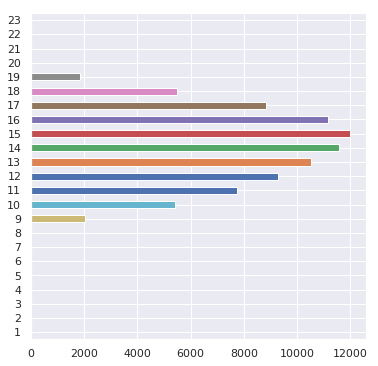

In [88]:
forc.daily[1:24].plot.barh(figsize=(6,6))

In [113]:
def get_plot(forecast):
    forecast.plot.barh(figsize=(6,6))
    img = BytesIO()  # create the buffer
    plt.savefig(img, format='png')  # save figure to the buffer
    img.seek(0)  # rewind your buffer
    plot_data = base64.b64encode(img.read()).decode()
    return plot_data

'{"daily_mean": 7803.158300789891, "plot_img": "iVBORw0KGgoAAAANSUhEUgAAAbAAAAGwCAYAAADITjAqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4xLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvDW2N/gAAIABJREFUeJzt3XtwVdX99/HPSdIEg8BJuAZIgTqGCSoyhilTVGgDA/UR0GpbEEGHCoyieE0BUQhX8QA/ASfQADKd2mFg2lEuAYegD+gzMlZBQEEQHEAMEi65gCFCQnL28wdDftEmkIQka62d9+u/nG32fL96zvm41177m4DneZ4AAHBMhOkCAACoCwIMAOAkAgwA4CQCDADgJAIMAOAkAgwA4CQCDADgJAIMAOAkAgwA4CQCDADgJAIMAOAkAgwA4CQCDADgJAIMAOAkAgwA4CQCDADgJAIMAOAkAgwA4CQCDADgJAIMAOAkAgwA4CQCDADgJAIMAOAkAgwA4CQCDADgJAIMAOAkAgwA4CQCDADgJAIMAOAkAgwA4CQCDADgJAIMAOAkAgwA4CQCDADgJAIMAOAkAgwA4CQCDADgJAIMAOAkAgwA4CQCDADgJAIMAOAkAgwA4CQCDADgJAIMAOAkAgwA4CQCDADgJAIMAOAkAgwA4CQCDADgJAIMAOAkAgwA4CQCDADgpCjTBTSkwsJihcOe6TLqTevWNys//4LpMuqdH/uiJzf4sSep7n1FRAQUF9e8ASpqGL4OsHDY81WASfJdP1f5sS96coMfe5L821dlRgOssLBQkyZN0nfffafo6Gh16dJFs2bNUjAY1COPPKKLFy9Kktq2bauZM2eqc+fOJssFAFjE6D2wQCCgsWPHKjs7W1lZWUpMTNTChQsVERGht956Sxs3btTGjRvVr18/vf766yZLBQBY

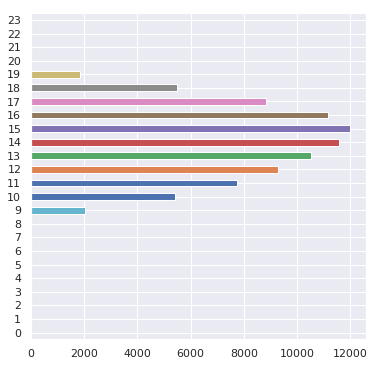

In [117]:
json.dumps({'daily_mean': 7803.158300789891, 
           'plot_img': get_plot(forc.daily[0:24])})

In [115]:
forc.daily[0:24].to_json()

'{"0":0.0,"1":0.0,"2":0.0,"3":0.0,"4":0.0,"5":0.0,"6":0.0,"7":0.0,"8":0.0,"9":2027.3682092937,"10":5411.8573159072,"11":7736.7708988515,"12":9285.4188165705,"13":10525.4783245032,"14":11562.2563603715,"15":11970.959793444,"16":11146.2707653234,"17":8849.3828246056,"18":5476.5841600159,"19":1842.3938398022,"20":0.0,"21":0.0,"22":0.0,"23":0.0}'

In [105]:
xtest.loc[xtest.nonzero()].mean()

7803.158300789891